In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os 
path  = os.getcwd()
print(path)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/Jupyternotebook_source/Section_24_Machine_learning


In [6]:
rfm = pd.read_csv('{0}/rfm.csv'.format(path))

In [7]:
rfm.info

<bound method DataFrame.info of       Unnamed: 0  Customer ID   last_date  recency  rank_recency  frequency  \
0              0      12346.0  2011-01-18      325      0.710338         34   
1              1      12347.0  2011-12-07        2      0.031202        222   
2              2      12348.0  2011-09-25       75      0.458085         51   
3              3      12349.0  2011-11-21       18      0.192229        175   
4              4      12350.0  2011-02-02      310      0.699286         17   
...          ...          ...         ...      ...           ...        ...   
5876        5876      18283.0  2011-12-06        3      0.046846        938   
5877        5877      18284.0  2010-10-04      431      0.831406         28   
5878        5878      18285.0  2010-02-17      660      0.967267         12   
5879        5879      18286.0  2010-08-20      476      0.868730         67   
5880        5880      18287.0  2011-10-28       42      0.337188        155   

      freq_ranking 

In [8]:
X = rfm[['frequency', 'monetary', 'recency']]

In [9]:
km = KMeans(n_clusters=3, n_init=10, max_iter=300, tol=0.0001)

In [11]:
fitting = km.fit_predict(X)

In [12]:
fitting

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
X['centroids'] = fitting

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


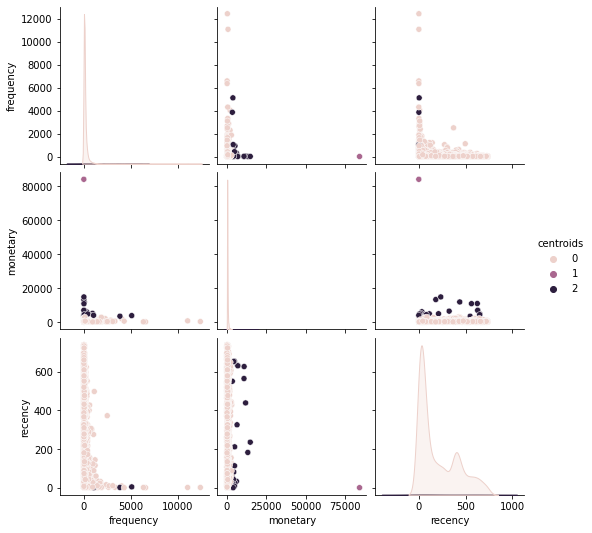

In [14]:
sns.pairplot(data=X, hue='centroids')

In [18]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, tol=0.0001)
    a = kmeans.fit(X)
    sse.append(a.inertia_)

In [19]:
sse

[9612311021.280624,
 2580021904.6090407,
 1708732491.2442124,
 1365145013.6737673,
 1043715426.4588587,
 819664333.8407749,
 625268606.8265455,
 491597941.6629905,
 419147052.90212965,
 349050389.53792155]

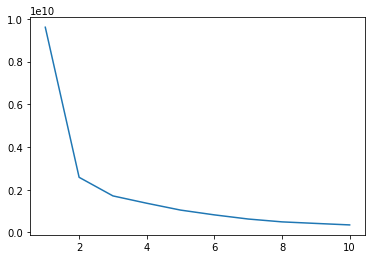

In [20]:
plt.plot(range(1,11),sse)


In [21]:
#### regression training model

In [22]:
retail_clean = pd.read_csv('{0}/retail_clean.csv'.format(path))

In [23]:
retail_clean.describe

<bound method NDFrame.describe of         Unnamed: 0  Invoice StockCode                          Description  \
0                0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS   
1                1   489434    79323P                   PINK CHERRY LIGHTS   
2                2   489434    79323W                  WHITE CHERRY LIGHTS   
3                3   489434     22041         RECORD FRAME 7" SINGLE SIZE    
4                4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX   
...            ...      ...       ...                                  ...   
779490     1067366   581587     22899         CHILDREN'S APRON DOLLY GIRL    
779491     1067367   581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
779492     1067368   581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
779493     1067369   581587     22138        BAKING SET 9 PIECE RETROSPOT    
779494     1067370   581587      POST                              POSTAGE   

        Quantity          Inv

In [24]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'])
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail_clean['date'] = pd.to_datetime(retail_clean['date'])

In [25]:
daily_revenue = retail_clean.groupby(['date']).agg(total_revenue=('Revenue', 'sum')).reset_index()

In [26]:
daily_revenue['month'] = daily_revenue['date'].dt.month
daily_revenue['dayofweek'] = daily_revenue['date'].dt.dayofweek
daily_revenue['trend'] = range(1, daily_revenue.shape[0] + 1)

In [27]:
daily_revenue['month'] = daily_revenue['month'].astype('category')

In [28]:
weekdays = {0: 'Monday',
1: 'Tuesday',
2: 'Wednesday',
3: 'Thursday',
4: 'Friday',
5: 'Saturday',
6: 'Sunday'
}

In [29]:
daily_revenue['dayofweek1'] = daily_revenue['dayofweek'].map(weekdays)

In [30]:
daily_revenue = daily_revenue.drop('dayofweek', axis=1)
daily_revenue_encoded = pd.get_dummies(daily_revenue)

In [31]:
daily_revenue_encoded

,date,total_revenue,trend,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,month_10,month_11,month_12,dayofweek1_Friday,dayofweek1_Monday,dayofweek1_Saturday,dayofweek1_Sunday,dayofweek1_Thursday,dayofweek1_Tuesday,dayofweek1_Wednesday
0,2009-12-01,43894.87,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2009-12-02,52762.06,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2009-12-03,67413.62,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,2009-12-04,33913.81,4,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,2009-12-05,9803.05,5,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2011-12-05,58081.09,600,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
600,2011-12-06,45989.66,601,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
601,2011-12-07,69230.60,602,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
602,2011-12-08,50395.96,603,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [32]:
daily_revenue

,date,total_revenue,month,trend,dayofweek1
0,2009-12-01,43894.87,12,1,Tuesday
1,2009-12-02,52762.06,12,2,Wednesday
2,2009-12-03,67413.62,12,3,Thursday
3,2009-12-04,33913.81,12,4,Friday
4,2009-12-05,9803.05,12,5,Saturday
...,...,...,...,...,...
599,2011-12-05,58081.09,12,600,Monday
600,2011-12-06,45989.66,12,601,Tuesday
601,2011-12-07,69230.60,12,602,Wednesday
602,2011-12-08,50395.96,12,603,Thursday


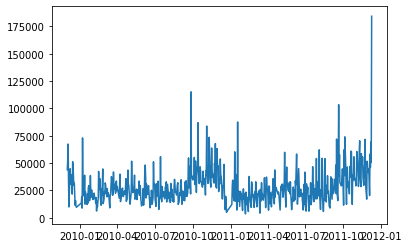

In [33]:

plt.plot(daily_revenue['date'],daily_revenue['total_revenue'])


In [34]:
# training

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
daily_revenue_encoded.shape

(604, 22)

In [38]:
X = daily_revenue_encoded.drop(['date', 'total_revenue'], axis=1).values

In [39]:
X

array([[  1,   0,   0, ...,   0,   1,   0],
       [  2,   0,   0, ...,   0,   0,   1],
       [  3,   0,   0, ...,   1,   0,   0],
       ...,
       [602,   0,   0, ...,   0,   0,   1],
       [603,   0,   0, ...,   1,   0,   0],
       [604,   0,   0, ...,   0,   0,   0]])

In [40]:
y = daily_revenue_encoded['total_revenue'].values

In [41]:
y

array([ 43894.87 ,  52762.06 ,  67413.62 ,  33913.81 ,   9803.05 ,
        24390.1  ,  33002.49 ,  44763.34 ,  30763.17 ,  38598.21 ,
        39204.17 ,  21577.35 ,  51245.16 ,  46836.63 ,  36927.3  ,
        29758.87 ,  31562.72 ,  11355.19 ,  15549.64 ,  10696.59 ,
         9485.67 ,  13415.09 ,  19051.19 ,   8731.26 ,  72989.38 ,
        30292.7  ,  23157.33 ,  19684.49 ,  38833.58 ,  12391.1  ,
        23721.64 ,  13499.55 ,  17363.25 ,  12078.84 ,  21892.791,
        13244.34 ,  27359.23 ,  29345.83 ,  15552.32 ,  18346.54 ,
        38570.37 ,  23722.72 ,  18914.83 ,  25382.441,  18261.86 ,
        16606.931,  19532.03 ,  17230.061,  22486.01 ,  19420.74 ,
        17023.92 ,  13016.04 ,  18398.26 ,   6082.34 ,  15061.87 ,
         9728.96 ,  17772.19 ,  42318.211,  25669.01 ,  26455.22 ,
        35737.24 ,  18931.99 ,  11394.731,  26336.24 ,  20840.01 ,
        30392.661,  44604.16 ,  12778.641,  16741.49 ,  23933.87 ,
        21667.8  ,  31849.7  ,  29966.35 ,  25361.64 ,  19034.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

In [44]:
len(X_train)

483

In [45]:
len(X_test)

121

In [47]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [54]:
# model linear
# model lasso
# model tree
# model knn
model_linear = LinearRegression().fit(X_train,y_train)
model_lasso = Lasso(alpha=0.006, normalize=True, tol=0.000001, max_iter=1000).fit(X_train, y_train)
model_tree = DecisionTreeRegressor().fit(X_train,y_train)
model_knn = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1351571149.9668198, tolerance: 85916.1689576716
  positive)


In [55]:
### training score
model_linear.score(X_train, y_train)
print(model_linear.score(X_train, y_train))
model_lasso.score(X_train, y_train)
print(model_lasso.score(X_train, y_train))
model_tree.score(X_train, y_train)
print(model_tree.score(X_train, y_train))
model_knn.score(X_train, y_train)
print(model_knn.score(X_train, y_train))

0.3796656758128837
0.3796656746191387
1.0
0.5900015742911999


In [56]:
### Testing Score
model_linear.score(X_test,y_test)
print(model_linear.score(X_test, y_test))
model_lasso.score(X_test, y_test)
print(model_lasso.score(X_test, y_test))
model_tree.score(X_test, y_test)
print(model_tree.score(X_test,y_test))
model_knn.score(X_test, y_test)
print(model_knn.score(X_test, y_test))

0.11940207833647809
0.11940015414401006
-0.689449221481963
-0.06775884984147851


In [57]:
### predictions
y_linear = model_linear.predict(X_test)
y_lasso = model_lasso.predict(X_test)
y_tree = model_tree.predict(X_test)
y_knn = model_knn.predict(X_test)

In [58]:
### mean squared error
mean_squared_error(y_test, y_linear)
print(mean_squared_error(y_test, y_linear))
mean_squared_error(y_test, y_lasso)
print(mean_squared_error(y_test, y_lasso))
mean_squared_error(y_test, y_tree)
print(mean_squared_error(y_test, y_tree))
mean_squared_error(y_test, y_knn)
print(mean_squared_error(y_test, y_knn))

414852034.61777323
414852941.10998803
795904043.9150726
503024048.13888186


In [59]:
### mean absoluate error
mean_absolute_error(y_test,y_linear)
print(mean_absolute_error(y_test,y_linear))
mean_absolute_error(y_test,y_lasso)
print(mean_absolute_error(y_test,y_lasso))
mean_absolute_error(y_test,y_tree)
print(mean_absolute_error(y_test,y_tree))
mean_absolute_error(y_test,y_knn)
print(mean_absolute_error(y_test,y_knn))


11604.045713869898
11604.132357418448
17410.624867768558
15038.95661432505


In [60]:
### parameter tuning

In [61]:
MAE_training = []
MAE_testing = []
neighbors = range(1,20)

for n in neighbors:
    model = KNeighborsRegressor(n_neighbors=n).fit(X_train,y_train)
    y_predict_training = model.predict(X_train)
    y_predict_testing = model.predict(X_test)
    training = mean_absolute_error(y_predict_training, y_train)
    testing = mean_absolute_error(y_predict_testing, y_test)
    MAE_training.append(training)
    MAE_testing.append(testing)

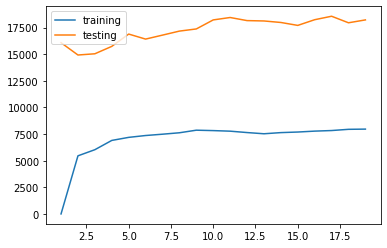

In [62]:
plt.plot(neighbors,MAE_training,label='training')
plt.plot(neighbors,MAE_testing,label='testing')
plt.legend(loc='upper left')



In [63]:
import numpy as np
MAE_training = []
MAE_testing = []
model_scores = []
alphas = np.linspace(0, 1, 100)

In [64]:
for alpha in alphas:
    model = Lasso(alpha=alpha, normalize=True, fit_intercept=True,
    max_iter=20000).fit(X_train,y_train)
    y_predict_training = model.predict(X_train)
    y_predict_testing = model.predict(X_test)
    scores = model.score(X_train, y_train)
    training = mean_absolute_error(y_predict_training, y_train)
    testing = mean_absolute_error(y_predict_testing, y_test)
    MAE_training.append(training)
    MAE_testing.append(testing)
    model_scores.append(scores)

/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26648374303.555267, tolerance: 8591616.89576716
  positive)
/Users/dang/Desktop/Learning/Mygit/datascience_supplychain_practice/env/lib/python3

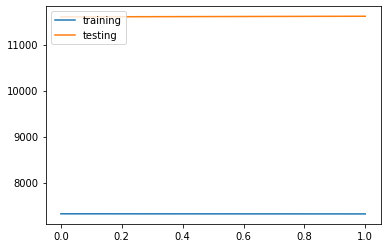

In [65]:
plt.plot(alphas,MAE_training,label='training')
plt.plot(alphas,MAE_testing,label='testing')
plt.legend(loc='upper left')


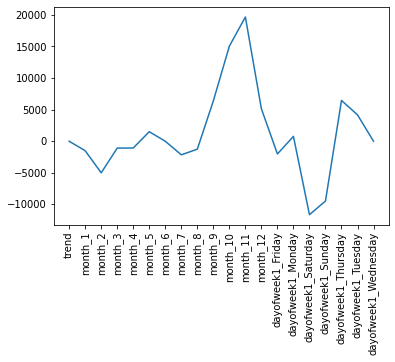

In [67]:

alpha_data= pd.DataFrame({'alpha':alphas,'training': MAE_training,
                          'testing':  MAE_testing,'scores':model_scores})


alpha_data[alpha_data.scores==max(alpha_data.scores)]

model_alpha= Lasso(alpha=20).fit(X_train,y_train)

model_alpha.coef_

names= daily_revenue_encoded.drop(['date','total_revenue'],axis=1).columns

plt.plot(names,model_alpha.coef_)
plt.xticks(rotation=90)

data_ceof= pd.DataFrame({'names':names,'coef': model_alpha.coef_})

